## Part 2 - Isolating the Best Live Tweeters
This notebook will mimick Notebook 3 in its attempt to isolate the most accurate tweeters and using only their sentiments to predict stock movement.

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import pickle
import datetime
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pickle_in=open("df_api.pickle","rb")
df_api=pickle.load(pickle_in)
pickle_in=open("daily_api_returns.pickle","rb")
daily_api_returns=pickle.load(pickle_in)
pickle_in=open("all_api_tweets.pickle","rb")
all_api_tweets=pickle.load(pickle_in)

## Adding the Resulting Stock Movement to Each Tweet
Note that this cell took about an hour to run.

In [11]:
# non_zeros identifies all trades that have a sentiment value that is not zero and has a numerical follower count
#all_api_tweets.reset_index(drop=True,inplace=True)
all_api_tweets['Date']=all_api_tweets.date_time.dt.strftime("%Y-%m-%d")
all_api_tweets['Date']=pd.to_datetime(all_api_tweets['Date'], infer_datetime_format=True)
all_api_tweets_w_results=all_api_tweets[(all_api_tweets.vader_score!=0) & (all_api_tweets.blob_score!=0)]
all_api_tweets_w_results=all_api_tweets_w_results.dropna(subset=['weighted_vader','weighted_blob'])
all_api_tweets_w_results.reset_index(drop=True,inplace=True)
all_api_tweets_w_results['vader_correct_yn']=None
all_api_tweets_w_results['vader_pnl']=None
all_api_tweets_w_results['blob_correct_yn']=None
all_api_tweets_w_results['blob_pnl']=None
for i in range(len(all_api_tweets_w_results)):
    try:
        if i%1000==0:
            print(i)
        stock=all_api_tweets_w_results.ticker[i]
        if all_api_tweets_w_results.date_time[i].time()<datetime.time(9,30):
            trade_day=all_api_tweets_w_results.Date[i]
        elif all_api_tweets_w_results.date_time[i].time()>datetime.time(16,0):
            trade_day=all_api_tweets_w_results.Date[i]+np.timedelta64(1,"D")
        else:
            trade_day=0
        if i%1000==0:
            print(trade_day)
        if trade_day==0:
            all_api_tweets_w_results['vader_correct_yn'][i]=-99
            all_api_tweets_w_results['vader_pnl'][i]=-99
            all_api_tweets_w_results['blob_correct_yn'][i]=-99
            all_api_tweets_w_results['blob_pnl'][i]=-99
        elif daily_api_returns.index.isin([trade_day]).any():
            stock_move=daily_api_returns[stock][trade_day]
            if (all_api_tweets_w_results.vader_score[i]>0) & (stock_move>0):
                all_api_tweets_w_results.vader_correct_yn[i]=1
                all_api_tweets_w_results.vader_pnl[i]=stock_move
            elif (all_api_tweets_w_results.vader_score[i]<0) & (stock_move<0):
                all_api_tweets_w_results.vader_correct_yn[i]=1
                all_api_tweets_w_results.vader_pnl[i]=-stock_move
            elif (all_api_tweets_w_results.vader_score[i]>0) & (stock_move<0):
                all_api_tweets_w_results.vader_correct_yn[i]=0
                all_api_tweets_w_results.vader_pnl[i]=stock_move
            elif (all_api_tweets_w_results.vader_score[i]<0) & (stock_move>0):
                all_api_tweets_w_results.vader_correct_yn[i]=0
                all_api_tweets_w_results.vader_pnl[i]=-stock_move
            else:
                None
            if (all_api_tweets_w_results.blob_score[i]>0) & (stock_move>0):
                all_api_tweets_w_results.blob_correct_yn[i]=1
                all_api_tweets_w_results.blob_pnl[i]=stock_move
            elif (all_api_tweets_w_results.blob_score[i]<0) & (stock_move<0):
                all_api_tweets_w_results.blob_correct_yn[i]=1
                all_api_tweets_w_results.blob_pnl[i]=-stock_move
            elif (all_api_tweets_w_results.blob_score[i]>0) & (stock_move<0):
                all_api_tweets_w_results.blob_correct_yn[i]=0
                all_api_tweets_w_results.blob_pnl[i]=stock_move
            elif (all_api_tweets_w_results.blob_score[i]<0) & (stock_move>0):
                all_api_tweets_w_results.blob_correct_yn[i]=0
                all_api_tweets_w_results.blob_pnl[i]=-stock_move
            else:
                None
        else:
            None
    except:
        None
# This removes useless values and saves the dataframe for future use
all_api_tweets_w_results=all_api_tweets_w_results[all_api_tweets_w_results.vader_correct_yn!=-99]
all_api_tweets_w_results=all_api_tweets_w_results[(all_api_tweets_w_results.vader_correct_yn==1) | (all_api_tweets_w_results.vader_correct_yn==0)]
pickle_out=open("all_api_tweets_w_results.pickle","wb")
pickle.dump(all_api_tweets_w_results,pickle_out)
pickle_out.close()

0
0


C:\Users\kylej\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kylej\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kylej\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kylej\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice f

1000
2019-07-31 00:00:00
2000
0
3000
2019-07-28 00:00:00
4000
2019-07-25 00:00:00
5000
2019-07-23 00:00:00
6000
0
7000
0
8000
2019-07-26 00:00:00
9000
2019-07-25 00:00:00
10000
2019-07-23 00:00:00
11000
0
12000
2019-07-31 00:00:00
13000
0
14000
0
15000
0
16000
2019-07-25 00:00:00
17000
0
18000
2019-07-24 00:00:00
19000
0
20000
2019-07-31 00:00:00
21000
2019-07-24 00:00:00
22000
2019-07-24 00:00:00
23000
0
24000
2019-07-24 00:00:00
25000
0
26000
0
27000
0
28000
2019-07-24 00:00:00
29000
0
30000
2019-07-23 00:00:00
31000
0
32000
2019-07-26 00:00:00
33000
0
34000
2019-07-31 00:00:00
35000
0
36000
2019-07-30 00:00:00
37000
2019-07-29 00:00:00
38000
2019-07-28 00:00:00
39000
2019-07-27 00:00:00
40000
0
41000
2019-07-26 00:00:00
42000
0
43000
0
44000
2019-07-25 00:00:00
45000
2019-07-25 00:00:00
46000
2019-07-25 00:00:00
47000
0
48000
2019-07-24 00:00:00
49000
2019-07-23 00:00:00
50000
0
51000
0


## Identifying Prolific Tweeters
This cell splits the data into a train and test set based on a date in time in order that we use the past to predict the future.  It then isolates larger tweeters and identifies the sentiment that each tweeter gives to each stock for each day that the tweeter tweets about a given stock. Finally this cell uses all of that data to give each tweeter an aggregate score based on his sentiment's ability to predict stock movements and creates a visualization of this data.

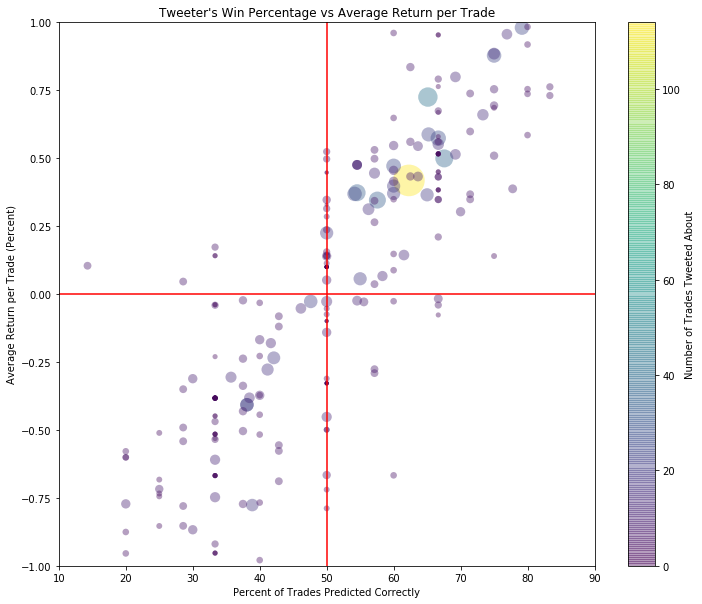

In [102]:
# Defining the train-test cutoff date
test_date_cutoff=pd.to_datetime('2019-07-25')
# The training set is to determine the big tweeters based on "past data"
all_api_tweets_w_results_train=all_api_tweets_w_results[all_api_tweets_w_results.Date<test_date_cutoff]
tweeter_rank_train=all_api_tweets_w_results_train['username'].value_counts()
# I have chosen the top 350 tweeters because above this threshold, each tweeter has at least 100 tweets
# over the given time period.  I have arbitrarily chosen 100 tweets as a cutoff because it allows for 
# at least 1 tweet per day
big_tweeters_train=tweeter_rank_train[:350]
# This creates an average sentiment score for each tweeter for each stock for each day
# This is done for all tweets from the train and test set, which will be split up below
tweeter_scores=pd.DataFrame([])
for tweeter in big_tweeters_train.keys():
    iso_tweets=all_api_tweets_w_results[all_api_tweets_w_results['username']==tweeter]
    days_tweeted=iso_tweets.Date.unique()
    for day in days_tweeted:
        day_tweets=iso_tweets[iso_tweets.Date==day]
        day_tweets_stocks=day_tweets.ticker.unique()
        for stock in day_tweets_stocks:
            stock_tweets=day_tweets[day_tweets.ticker==stock]
            stock_tweets.reset_index(drop=True,inplace=True)
            avg_vader_sent=stock_tweets.vader_score.mean()
            if avg_vader_sent>0:
                vader_predict=1
            else:
                vader_predict=-1
            avg_blob_sent=stock_tweets.blob_score.mean()
            if avg_blob_sent>0:
                blob_predict=1
            else:
                blob_predict=-1
            stock_up=stock_tweets.vader_score[0]*(stock_tweets.vader_correct_yn[0]-.5)
            if stock_up>0:
                stock_move=np.abs(stock_tweets.vader_pnl[0])
            else:
                stock_move=-np.abs(stock_tweets.vader_pnl[0])
            if (avg_vader_sent*stock_move)>0:
                vader_correct_yn=1
            else:
                vader_correct_yn=0
            if (avg_blob_sent*stock_move)>0:
                blob_correct_yn=1
            else:
                blob_correct_yn=0
            vader_return=vader_predict*stock_move
            blob_return=blob_predict*stock_move
            if stock_up>0:
                stock_up_dn=1
            else:
                stock_up_dn=-1
            tweeter_scores=tweeter_scores.append(pd.DataFrame({'tweeter':tweeter,'day':day,'stock':stock,
                                                               'stock_move':stock_move,
                                                               'stock_up_dn':stock_up_dn,
                                                              'avg_vader_sent':avg_vader_sent,
                                                              'avg_blob_sent':avg_blob_sent,
                                                              'vader_predict':vader_predict,
                                                              'blob_predict':blob_predict,
                                                              'vader_correct':vader_correct_yn,
                                                              'blob_correct':blob_correct_yn,
                                                              'vader_return':vader_return,
                                                              'blob_return':blob_return},index=[0]),ignore_index=True)
# This splits the tweets into train and test sets
tweeter_scores_train=tweeter_scores[tweeter_scores.day<test_date_cutoff]
tweeter_scores_test=tweeter_scores[tweeter_scores.day>=test_date_cutoff]

# This takes the training set and gives each tweeter an aggregate score for all of his tweeting
tweeter_ag_scores=pd.DataFrame([])
for tweeter in big_tweeters_train.keys():
    holder=tweeter_scores_train[tweeter_scores_train.tweeter==tweeter]
    holder.reset_index(drop=True,inplace=True)
    tweeter_ag_scores=tweeter_ag_scores.append(pd.DataFrame({'tweeter':tweeter,'stocks_predicted':len(holder),
                                                             'avg_vader_sent':holder.avg_vader_sent.mean(),
                                                            'avg_blob_sent':holder.avg_blob_sent.mean(),
                                                            'pct_vader_correct':holder.vader_correct.mean(),
                                                            'pct_blob_correct':holder.blob_correct.mean(),
                                                            'total_vader_return':holder.vader_return.sum(),
                                                            'total_blob_return':holder.blob_return.sum(),
                                                            'avg_vader_return':holder.vader_return.mean(),
                                                            'avg_blob_return':holder.blob_return.mean()},
                                                            index=[0]),ignore_index=True)

# This creates a scatter plot where each point is an individual tweeter. Its size and color represent
# the volume of tweets of tweets of theirs that were included in the training set. The x-value is the
# percentage of picks that they got correct and the y_value is the average return per trade.
plt.figure(figsize=(12,10))
plt.scatter(tweeter_ag_scores.pct_vader_correct*100,tweeter_ag_scores.avg_vader_return*100, label=None,
            c=tweeter_ag_scores.stocks_predicted, cmap='viridis',
            linewidth=0, alpha=.4,s=tweeter_ag_scores.stocks_predicted*(1000/tweeter_ag_scores.stocks_predicted.max()))
plt.axis(aspect='equal')
plt.xlabel('Percent of Trades Predicted Correctly')
plt.ylabel('Average Return per Trade (Percent)')
plt.xlim(10,90)
plt.ylim(-1,1)
plt.colorbar(label='Number of Trades Tweeted About')
plt.clim(0,tweeter_ag_scores.stocks_predicted.max())
plt.title("Tweeter's Win Percentage vs Average Return per Trade")
plt.axhline(0,color='red')
plt.axvline(50,color='red')

The chart above shows us that there clearly appear to be some tweeters whose sentiment scores are more useful in predicting stock movements. Below I use the test data set to see if this observation holds true on unseen data.

Below I create 3D scatter plots to visualize the relationships between variables.

In [103]:
test_range=[.35,.375,.4,.425,.45,.475,.5,.525,.55,.575,.6,.625,.65,.675,.7]
results=pd.DataFrame([])
for i in test_range:
    det_results=pd.DataFrame([])
    best_tweeters=tweeter_ag_scores[tweeter_ag_scores.pct_vader_correct>i]
    big=tweeter_scores_test[tweeter_scores_test.tweeter.isin(best_tweeters.tweeter)]
    days=big.day.unique()
    for day in days:
        holder=big[big.day==day]
        day_stocks=holder.stock.unique()
        day_mkt_returns=[]
        day_mkt_winners=[]
        day_vader_returns=[]
        day_vader_winners=[]
        day_blob_returns=[]
        day_blob_winners=[]
        for stock in day_stocks:
            holder2=holder[holder.stock==stock]
            holder2.reset_index(drop=True,inplace=True)
            vader_score=holder2.avg_vader_sent.mean()
            blob_score=holder2.avg_blob_sent.mean()
            if vader_score*holder2.stock_move[0]>0:
                day_vader_returns.append(holder2.stock_move[0])
                day_vader_winners.append(1)
            else:
                day_vader_returns.append(-np.abs(holder2.stock_move[0]))
                day_vader_winners.append(0)
            if blob_score*holder2.stock_move[0]>0:
                day_blob_returns.append(holder2.stock_move[0])
                day_blob_winners.append(1)
            else:
                day_blob_returns.append(-np.abs(holder2.stock_move[0]))
                day_blob_winners.append(0)
            if holder2.stock_move[0]>0:
                day_mkt_winners.append(1)
            else:
                day_mkt_winners.append(0)
            day_mkt_returns.append(holder2.stock_move[0])
            det_results=det_results.append(pd.DataFrame({'day':day,'stock':stock,'vader_score':vader_score,
                                                        'blob_score':blob_score,'num_tweeters':len(holder2),
                                                        'stock_move':holder2.stock_move[0]},index=[0]),ignore_index=True)
    num_tweet_values=det_results.num_tweeters.unique()
    for j in num_tweet_values:
        test=det_results[det_results.num_tweeters>j]
        test.reset_index(drop=True,inplace=True)
        q1,q2,q3,q4,fails=[],[],[],[],[]
        for k in range(len(test)):
            if (test.vader_score[k]<0) & (test.stock_move[k]>0):
                q1.append(-test.stock_move[k])
            elif (test.vader_score[k]>0) & (test.stock_move[k]>0):
                q2.append(test.stock_move[k])
            elif (test.vader_score[k]>0) & (test.stock_move[k]<0):
                q3.append(test.stock_move[k])
            elif (test.vader_score[k]<0) & (test.stock_move[k]<0):
                q4.append(-test.stock_move[k])
            else:
                fails.append(1)
        total_return=np.sum(q1)+np.sum(q2)+np.sum(q3)+np.sum(q4)
        num_trades=len(test)-np.sum(fails)
        if total_return>0:
            ret_pos=1
        else:
            ret_pos=0
        results=results.append(pd.DataFrame({'tweeter_acc_thresh':i,'min_tweeters':j,
                                             'avg_ret':total_return/num_trades*100,'ret_pos':ret_pos,
                                             'pct_correct':(len(q2)+len(q4))/num_trades*100},index=[0]),ignore_index=True)

# This is the mean return of all trades and is the benchmark that we are hoping to beat
bench=daily_api_returns.mean().mean()*100       
above_bench_results=results[results.avg_ret>bench]
pos_results=results[(results.avg_ret>0) & (results.avg_ret<bench)]
neg_results=results[results.avg_ret<0]        
xb=above_bench_results.tweeter_acc_thresh
yb=above_bench_results.min_tweeters
zb=above_bench_results.avg_ret
xp=pos_results.tweeter_acc_thresh
yp=pos_results.min_tweeters
zp=pos_results.avg_ret
xn=neg_results.tweeter_acc_thresh
yn=neg_results.min_tweeters
zn=neg_results.avg_ret
data=[]
trace1=dict(name='Above Benchmark Return',x=xb,y=yb,z=zb,type="scatter3d",mode='markers',
            marker=dict(size=3,color='blue',line=dict(width=0)))
trace2=dict(name='Positive Return',x=xp,y=yp,z=zp,type="scatter3d",mode='markers',
            marker=dict(size=3,color='green',line=dict(width=0)))
trace3=dict(name='Negative Return',x=xn,y=yn,z=zn,type="scatter3d",mode='markers',
            marker=dict(size=3,color='red',line=dict(width=0)))
data.append(trace1)
data.append(trace2)
data.append(trace3)
layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Average Return by Tweeter Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=.7),
        aspectmode = 'manual'        
    ),
)
fig = go.Figure(data=data, layout=layout)
fig.show()

bench=((daily_api_returns>0).sum().sum())/((daily_api_returns.shape[0])*(daily_api_returns.shape[1]))*100
results=results[results.pct_correct<80]
results=results[results.pct_correct>20]
above_bench_results=results[results.pct_correct>bench]
pos_results=results[(results.pct_correct>50) & (results.pct_correct<bench)]
neg_results=results[results.pct_correct<50]        
xb=above_bench_results.tweeter_acc_thresh
yb=above_bench_results.min_tweeters
zb=above_bench_results.pct_correct
xp=pos_results.tweeter_acc_thresh
yp=pos_results.min_tweeters
zp=pos_results.pct_correct
xn=neg_results.tweeter_acc_thresh
yn=neg_results.min_tweeters
zn=neg_results.pct_correct
data=[]
trace1=dict(name='Above Benchmark Percent Correct',x=xb,y=yb,z=zb,type="scatter3d",mode='markers',
            marker=dict(size=3,color='blue',line=dict(width=0)))
trace2=dict(name='Above 50% Correct',x=xp,y=yp,z=zp,type="scatter3d",mode='markers',
            marker=dict(size=3,color='green',line=dict(width=0)))
trace3=dict(name='Below 50% Correct',x=xn,y=yn,z=zn,type="scatter3d",mode='markers',
            marker=dict(size=3,color='red',line=dict(width=0)))
data.append(trace1)
data.append(trace2)
data.append(trace3)
layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Percent Correct by Tweeter Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=.7),
        aspectmode = 'manual'        
    ),
)
fig = go.Figure(data=data, layout=layout)
fig.show()

C:\Users\kylej\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\kylej\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning:

invalid value encountered in double_scalars



## Results
In both of the 3D plots above, the x-axis is the minimum percent correct score that is included in the data point, the y-axis is the minimum number of tweeters who have tweeted about a particular stock on a particular day.  In the top chart the z-axis is the average percent return of the stocks that have been isolated for each data point. In the bottom chart the z-axis is the percent of isolated trades that were predicted correctly.

In both charts we see the general trend that as more accurate tweeters are included, the higher average return and the higher percent correct.  In both charts we see a weaker trend that as the number of tweeters increases, so does the performance.  This analysis is very limited in scope and out of date, but it shows that there may be use in identifying the best tweeters and using the sentiment of their tweets to give insight into stock movements.

## Example Real-World Use
For demonstration purposes I have chosen a tweeter accuracy threshold of .55 and a minimum number of tweeters of 13.

Average Return of Isolated Trdes:  0.645 %
Standard Deviation of Return of Isolated Trades:  1.757 %
Average Return of All Trdes:  0.007 %
Standard Deviation of Return of All Trades:  1.759 %
Isolated Trades Percent Correct:  60.0 %
All Trades Percent Up:  45.94 %
Percent of Total Trades Taken:  6.71 %
Welch's t-test Coefficient:  2.21
Welch's t-test p-value:  0.03


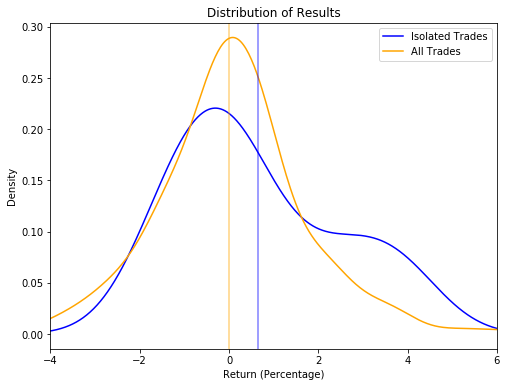

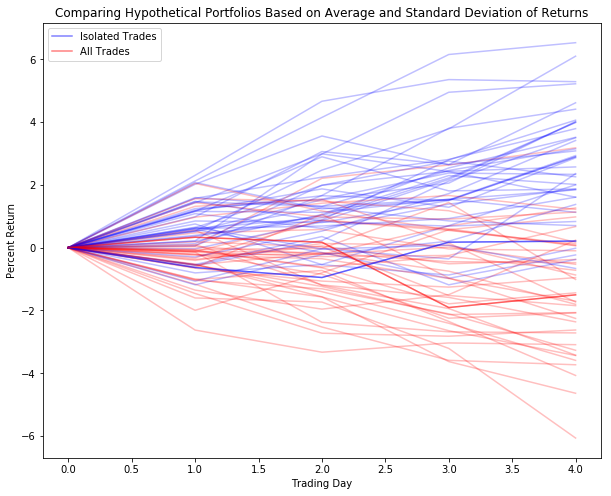

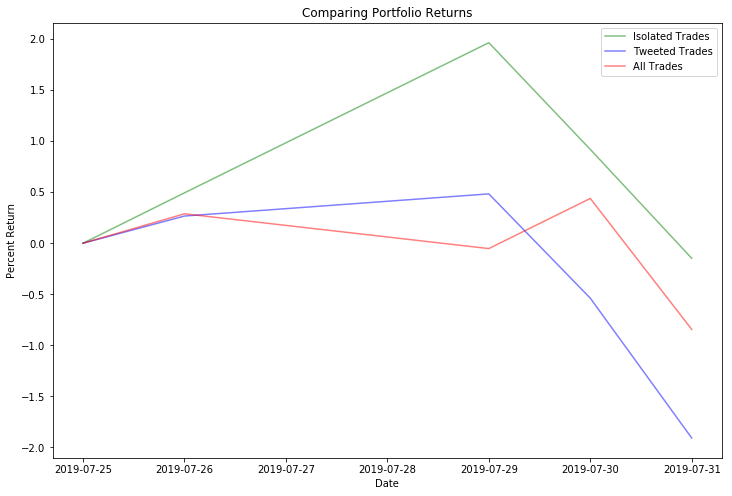

In [123]:
tweeter_acc_thresh=.55
min_tweeters=13
det_results=pd.DataFrame([])
best_tweeters=tweeter_ag_scores[tweeter_ag_scores.pct_vader_correct>tweeter_acc_thresh]
big=tweeter_scores_test[tweeter_scores_test.tweeter.isin(best_tweeters.tweeter)]
days=big.day.unique()
for day in days:
    holder=big[big.day==day]
    day_stocks=holder.stock.unique()
    day_mkt_returns=[]
    day_mkt_winners=[]
    day_vader_returns=[]
    day_vader_winners=[]
    day_blob_returns=[]
    day_blob_winners=[]

    for stock in day_stocks:
        holder2=holder[holder.stock==stock]
        holder2.reset_index(drop=True,inplace=True)
        vader_score=holder2.avg_vader_sent.mean()
        blob_score=holder2.avg_blob_sent.mean()
        if vader_score*holder2.stock_move[0]>0:
            vader_return=holder2.stock_move[0]
            day_vader_returns.append(vader_return)
            day_vader_winners.append(1)
        else:
            vader_return=-np.abs(holder2.stock_move[0])
            day_vader_returns.append(vader_return)
            day_vader_winners.append(0)
        if blob_score*holder2.stock_move[0]>0:
            blob_return=holder2.stock_move[0]
            day_blob_returns.append(blob_return)
            day_blob_winners.append(1)
        else:
            blob_return=-np.abs(holder2.stock_move[0])
            day_blob_returns.append(blob_return)
            day_blob_winners.append(0)
        if holder2.stock_move[0]>0:
            day_mkt_winners.append(1)
            stock_updn=1
        else:
            day_mkt_winners.append(0)
            stock_updn=0
        day_mkt_returns.append(holder2.stock_move[0])
        det_results=det_results.append(pd.DataFrame({'day':day,'stock':stock,'vader_score':vader_score,
                                                    'blob_score':blob_score,'num_tweeters':len(holder2),
                                                     'vader_return':vader_return,'blob_return':blob_return,
                                                    'stock_move':holder2.stock_move[0],
                                                    'stock_updn':stock_updn},index=[0]),ignore_index=True)
test=det_results[det_results.num_tweeters>min_tweeters]
test.reset_index(drop=True,inplace=True)
results=pd.DataFrame([])
daily_api_returns_test=daily_api_returns[daily_api_returns.index>test_date_cutoff]
days=daily_api_returns_test.index.values
days=days[::-1]
results=results.append(pd.DataFrame({'day':days.min()-np.timedelta64(1,"D"),'mkt_returns':0,
                                         'tweet_returns':0,
                                         'iso_tweet_returns':0,
                                             'mkt_trades':0,'tweet_trades':0,
                                             'iso_trades':0},index=[0]),ignore_index=True)
for day in days:
    mkt=daily_api_returns[daily_api_returns.index==day].T
    all_tweet_trades=det_results[det_results.day==day]
    iso_tweet_trades=test[test.day==day]
    if len(iso_tweet_trades)>0:
        results=results.append(pd.DataFrame({'day':day,'mkt_returns':mkt.mean()[0],
                                         'tweet_returns':all_tweet_trades.stock_move.mean(),
                                         'iso_tweet_returns':iso_tweet_trades.vader_return.mean(),
                                             'mkt_trades':len(mkt),'tweet_trades':len(all_tweet_trades),
                                             'iso_trades':len(iso_tweet_trades)},index=[0]),ignore_index=True)

q1,q2,q3,q4,fails=[],[],[],[],[]
for k in range(len(test)):
    if (test.vader_score[k]<0) & (test.stock_move[k]>0):
        q1.append(-test.stock_move[k])
    elif (test.vader_score[k]>0) & (test.stock_move[k]>0):
        q2.append(test.stock_move[k])
    elif (test.vader_score[k]>0) & (test.stock_move[k]<0):
        q3.append(test.stock_move[k])
    elif (test.vader_score[k]<0) & (test.stock_move[k]<0):
        q4.append(-test.stock_move[k])
    else:
        fails.append(1)
all_trades=q1.copy()
all_trades.extend(q2)
all_trades.extend(q3)
all_trades.extend(q4)
total_return=np.sum(q1)+np.sum(q2)+np.sum(q3)+np.sum(q4)
num_trades=len(test)-len(fails)
iso_trades2=pd.DataFrame(all_trades,columns=['a'])
iso_trades2=iso_trades2*100
all_trades2=daily_api_returns.stack()
all_trades2=all_trades2*100
all_trades2=pd.DataFrame(all_trades2,columns=['a'])
plt.figure(figsize=(8,6))
iso_trades2.a.plot.kde(label='Isolated Trades',color='blue')
all_trades2.a.plot.kde(label='All Trades',color='orange')
plt.xlim(-4,6)
plt.axvline(iso_trades2.a.mean(),color='blue',alpha=.5)
plt.axvline(all_trades2.a.mean(),color='orange',alpha=.5)
on=0
if on==1:
    plt.axvline(iso_trades2.a.mean()+iso_trades2.a.std(),color='blue',alpha=.5,linestyle=':')
    plt.axvline(all_trades2.a.mean()+all_trades2.a.std(),color='orange',alpha=.5,linestyle=':')
    plt.axvline(iso_trades2.a.mean()-iso_trades2.a.std(),color='blue',alpha=.5,linestyle=':')
    plt.axvline(all_trades2.a.mean()-all_trades2.a.std(),color='orange',alpha=.5,linestyle=':')
plt.xlabel('Return (Percentage)')
plt.title('Distribution of Results')
plt.legend()
t_test=stats.ttest_ind(all_trades,daily_api_returns_test.stack())
print('Average Return of Isolated Trdes: ',round(total_return/num_trades*100,3),'%')
print('Standard Deviation of Return of Isolated Trades: ',round(np.std(all_trades)*100,3),'%')
print('Average Return of All Trdes: ',round(daily_api_returns.stack().mean()*100,3),'%')
print('Standard Deviation of Return of All Trades: ',round(daily_api_returns.stack().std()*100,3),'%')
print('Isolated Trades Percent Correct: ',round((len(q2)+len(q4))/num_trades*100,2),'%')
print('All Trades Percent Up: ',round(((daily_api_returns_test>0).sum().sum())/((daily_api_returns_test.shape[0])*(daily_api_returns_test.shape[1]))*100,2),'%')
print('Percent of Total Trades Taken: ',round(num_trades/len(det_results)*100,2),'%')
print("Welch's t-test Coefficient: ",round(t_test[0],2))
print("Welch's t-test p-value: ",round(t_test[1],2))
plt.figure(figsize=(10,8))
for j in range(0,40):
    c=int(len(test)/len(daily_api_returns_test))
    a=np.random.normal(total_return/num_trades*100,np.std(all_trades)*100,(int(len(daily_api_returns_test)*daily_api_returns_test.shape[1]*num_trades/len(det_results))+2))
    b=np.random.normal(daily_api_returns_test.stack().mean()*100,daily_api_returns_test.stack().std()*100,(int(len(daily_api_returns_test)*daily_returns_test.shape[1]*num_trades/len(det_results))+2))
    compare=pd.DataFrame([])
    compare=compare.append(pd.DataFrame({'day':0,'iso_ret':0,'all_ret':0},index=[0]),ignore_index=True)
    for i in range(len(daily_api_returns_test)):
        compare=compare.append(pd.DataFrame({'day':i+1,'iso_ret':np.mean(a[(i*c):((i+1)*c-1)]),
                                            'all_ret':np.mean(b[(i*c):((i+1)*c-1)])},index=[0]),ignore_index=True)
    compare['sum_iso']=compare.iso_ret.cumsum()
    compare['sum_all']=compare.all_ret.cumsum()
    plt.plot(compare.day,compare.sum_iso,color='blue',alpha=.25,label='_nolegend_')
    plt.plot(compare.day,compare.sum_all,color='red',alpha=.25,label='_nolegend_')
plt.plot(compare.day,compare.sum_iso,color='blue',alpha=.5,label='Isolated Trades')
plt.plot(compare.day,compare.sum_all,color='red',alpha=.5,label='All Trades')
plt.xlabel('Trading Day')
plt.ylabel('Percent Return')
plt.title('Comparing Hypothetical Portfolios Based on Average and Standard Deviation of Returns')
plt.legend()
results['sum_mkt']=results.mkt_returns.cumsum()
results['sum_twt']=results.tweet_returns.cumsum()
results['sum_iso']=results.iso_tweet_returns.cumsum()
plt.figure(figsize=(12,8))
plt.plot(results.day,results.sum_iso*100,color='green',alpha=.5,label='Isolated Trades')
plt.plot(results.day,results.sum_twt*100,color='blue',alpha=.5,label='Tweeted Trades')
plt.plot(results.day,results.sum_mkt*100,color='red',alpha=.5,label='All Trades')
plt.xlabel('Date')
plt.ylabel('Percent Return')
plt.title('Comparing Portfolio Returns')
plt.legend()

## Interpretation
- The average return of the isolated trades is more than six times greater than that of all trades.
- The standard deviation of returns of the isolated trades is slightly smaller than that of all trades, meaning that it is adding significant value in the form of increased risk adjusted returns.
- The isolated trades also have a greater accuracy than the benchmark of simply buying all trades.
- There are about 1/16th the number of trades that fall into this category.
- Welch's t-test tells us that the mean value of the isolated trades is higher than that of all trades and that it is statistically significant.  However I do not think that this should be considered significant based on the very small size of the dataset.

The chart is a visualization of hypotheical 4 day trading windows whose behavior mimicks what is described in the statistics above the chart.  For each day, 4 trades from both return distributions are averaged to find the equal risk weighted return for the day.  This is done for each day in the chart and forms one line; this is then repeated 40 times.  We can see that the blue cloud is higher and narrower than the red cloud.  This reflects how the average return is greater but with less variance for the isolated trades than for all trades.

# Conclusion:
- There is compelling evidence that isolating tweeters who have been accurate in recent trading can give an advantage in trading when compared to the general market.
- This conclusion has been reached using extremely limited data and should not be taken directly into live markets without significant further exploration.

# Further Work:
- Purchasing a Twitter Developer subscription and do this same analysis with significantly more data over a much longer time period.
- Make sure that both bull and bear markets are included in future analysis.